In [4]:
import pandas as pd
import graphviz
from code_data_science import data_table as dt

df = dt.read_csv('../samples/cobol_find_copybook.csv')

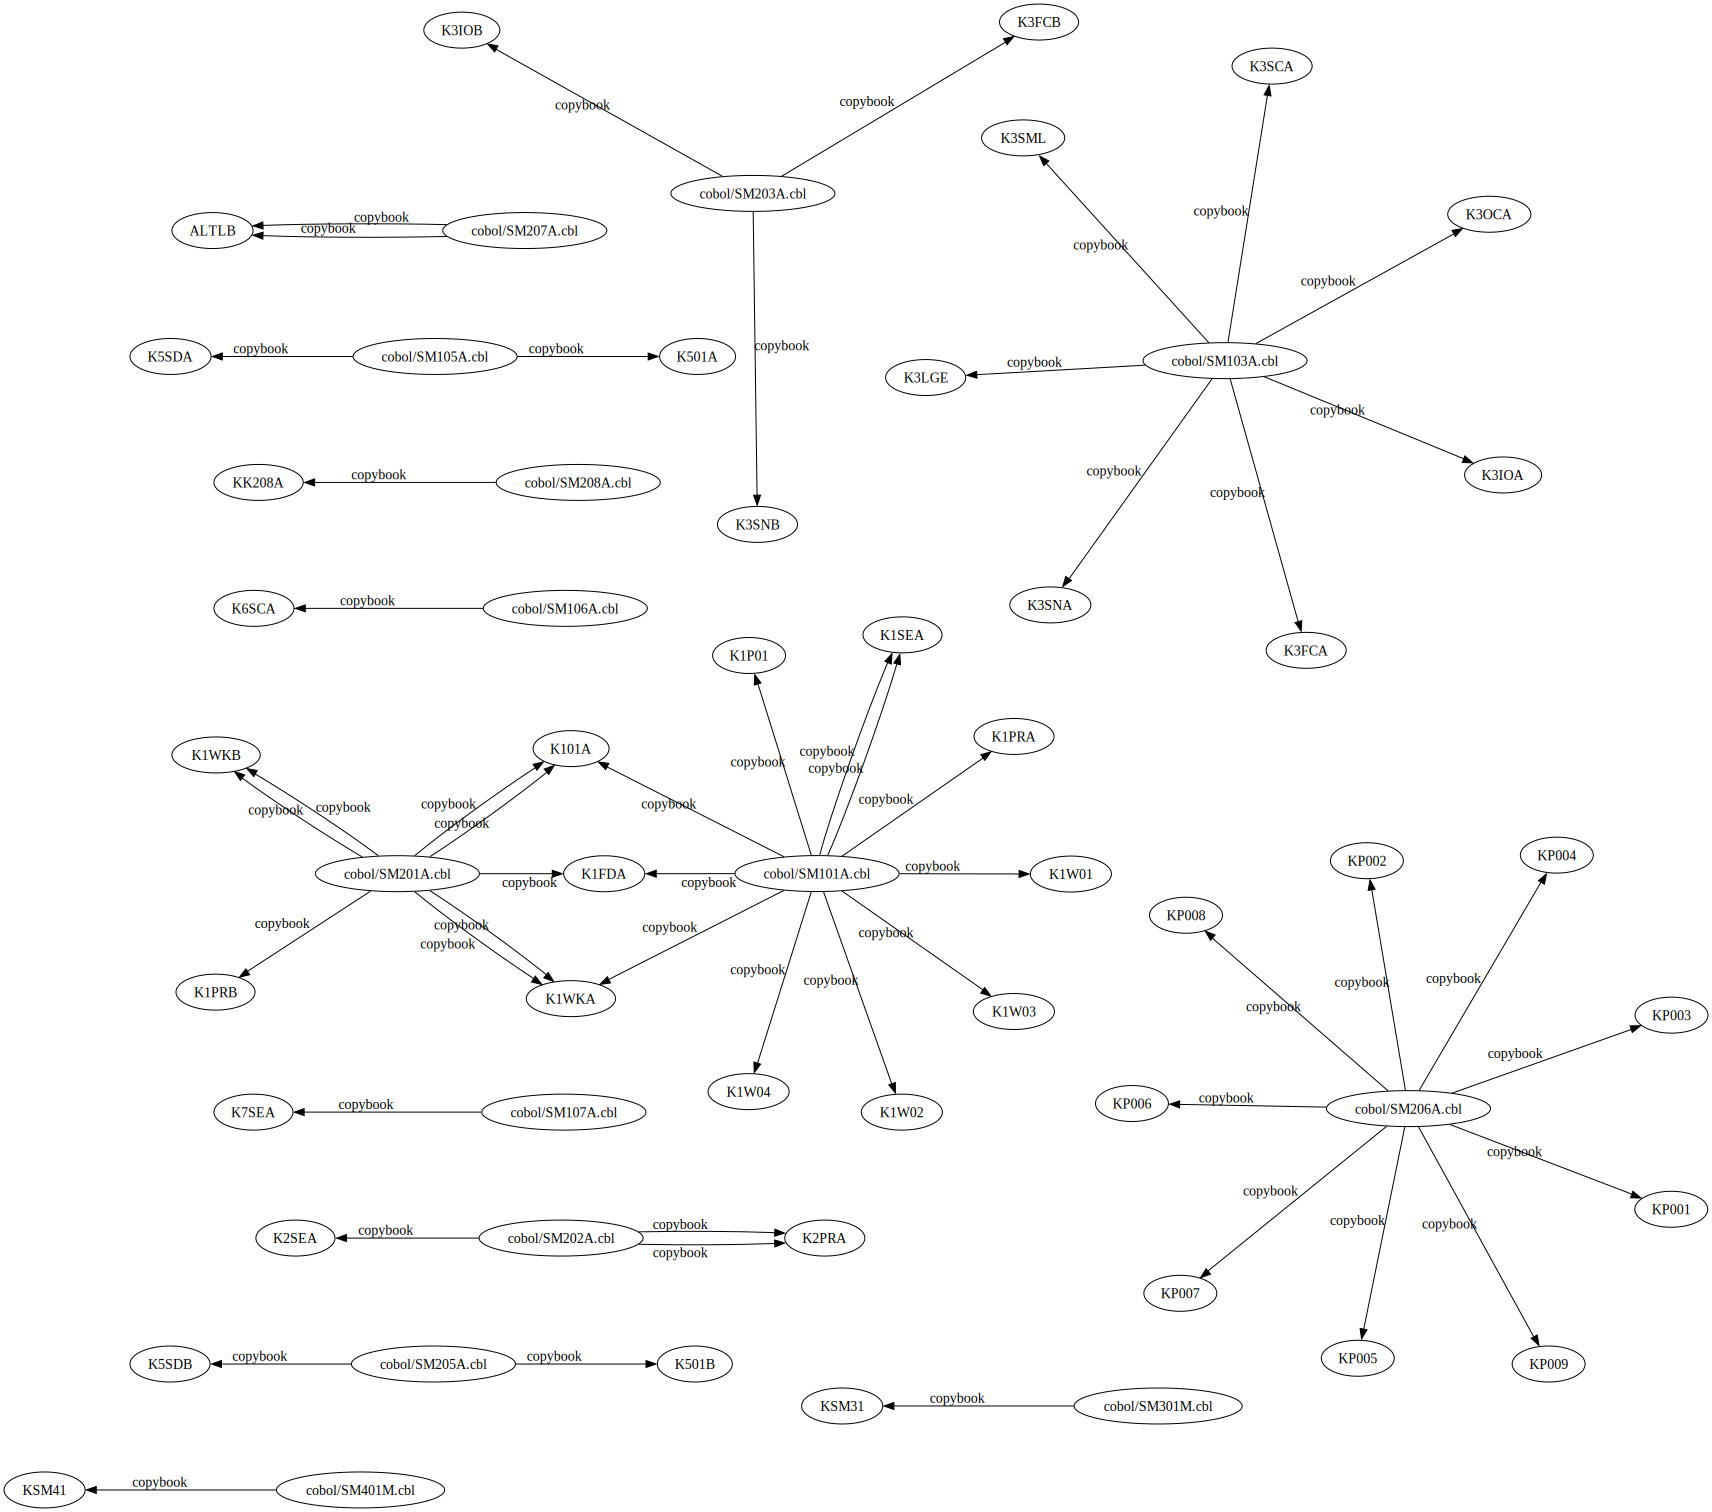

In [5]:
graphviz.set_jupyter_format('svg')
graphviz.set_default_engine('sfdp')
dot = graphviz.Digraph('copybook-usage', comment='Usage of COBOL copybooks')

def styleNode(value):
    if value == 'MISSING_SOURCE': 
        return 'red'
    return 'white'

def describeNode(value):
    if value == 'MISSING_SOURCE':
        return 'missing copybook'
    return 'copybook'

def mapCopybookToSource(row):
    dot.node(row['copybookName'], style='filled', fillcolor=styleNode(row['resolutionStatus']))
    dot.node(row['source'])
    dot.edge(row['source'], row['copybookName'], describeNode((row['resolutionStatus'])))

df.apply(mapCopybookToSource, axis=1)

dot